In [30]:
import os
os.chdir("D:\PGA16\FbProphet-master")
import pandas as pd

In [31]:
df=pd.read_csv("airline_passengers.csv")

In [32]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [33]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [34]:
df.columns=['ds','y']

In [35]:
df.tail()

,ds,y
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [36]:
df.drop(144,axis=0,inplace=True)

In [37]:
df.tail()

,ds,y
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [40]:
df['ds'] = pd.to_datetime(df['ds'])

In [41]:
df.head()

,ds,y,Date
0,1949-01-01,112.0,1949-01-01
1,1949-02-01,118.0,1949-02-01
2,1949-03-01,132.0,1949-03-01
3,1949-04-01,129.0,1949-04-01
4,1949-05-01,121.0,1949-05-01


In [42]:
df.drop('Date',axis=1,inplace=True)

In [43]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [45]:
from fbprophet import Prophet

In [46]:
model=Prophet()

In [51]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [52]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [55]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [59]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [61]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [62]:
prediction=model.predict(future_dates)

In [63]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.320611,54.477950,114.569336,106.320611,106.320611,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,0.0,0.0,0.0,84.378677
1,1949-02-01,108.500995,47.604475,106.162631,108.500995,108.500995,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,0.0,0.0,0.0,77.786826
2,1949-03-01,110.470374,77.961191,138.356625,110.470374,110.470374,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,0.0,0.0,0.0,109.994541
3,1949-04-01,112.650758,78.568973,134.791127,112.650758,112.650758,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,0.0,0.0,0.0,107.446903
4,1949-05-01,114.760808,84.965247,140.865989,114.760808,114.760808,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,0.0,0.0,0.0,110.934953


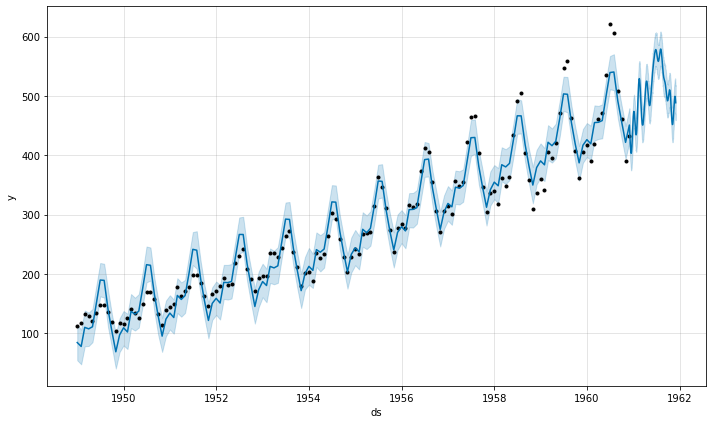

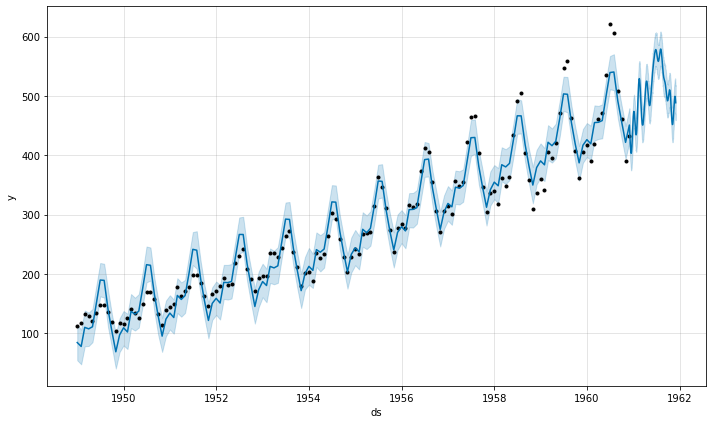

In [64]:
### plot the predicted projection
model.plot(prediction)

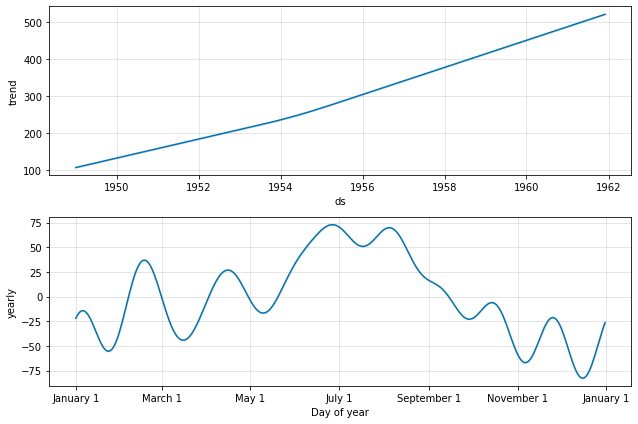

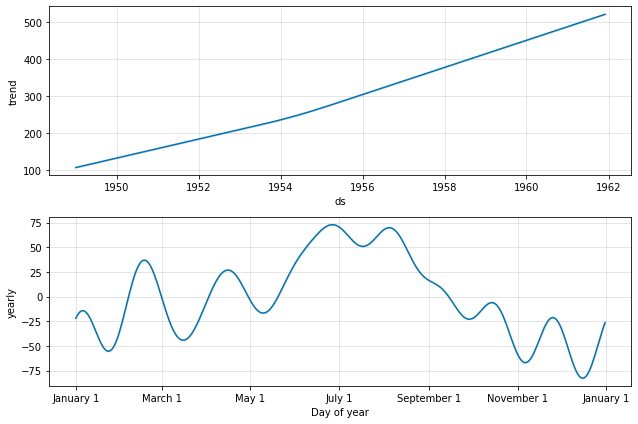

In [65]:

#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [66]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [67]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


  0%|          | 0/19 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,156.819730,156.574659,157.081237,150.0,1951-01-18
1,1951-03-01,169.267028,168.534474,170.084250,178.0,1951-01-18
2,1951-04-01,156.601332,155.151485,158.314424,163.0,1951-01-18
3,1951-05-01,142.228261,139.929453,144.966908,172.0,1951-01-18
4,1951-06-01,177.404761,173.889003,181.237260,178.0,1951-01-18


In [69]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1085.982413,32.954247,25.858707,0.078429,0.073811,0.272727
1,42 days,1013.087718,31.829039,25.298741,0.077251,0.073811,0.227273
2,46 days,910.373154,30.172391,24.801127,0.079580,0.084098,0.181818
3,47 days,1044.626120,32.320676,26.980818,0.082844,0.085696,0.181818
4,48 days,1033.404419,32.146608,26.391799,0.080742,0.085696,0.227273


In [75]:
df_p.min()

horizon     40 days 00:00:00
mse               290.023845
rmse               17.030086
mae                12.732194
mape                0.047294
mdape               0.030947
coverage            0.136364
dtype: object

In [70]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1085.982413,32.954247,25.858707,0.078429,0.073811,0.272727
1,42 days,1013.087718,31.829039,25.298741,0.077251,0.073811,0.227273
2,46 days,910.373154,30.172391,24.801127,0.079580,0.084098,0.181818
3,47 days,1044.626120,32.320676,26.980818,0.082844,0.085696,0.181818
4,48 days,1033.404419,32.146608,26.391799,0.080742,0.085696,0.227273


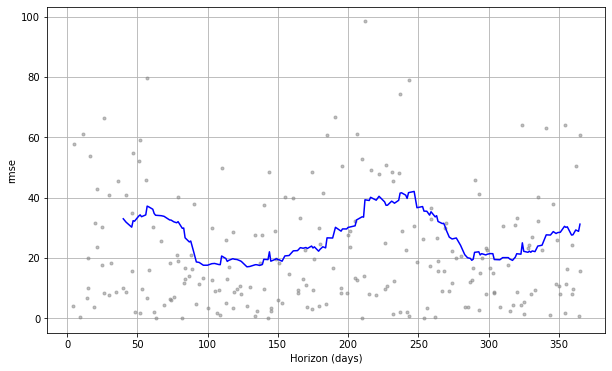

In [71]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')